# Imports

In [1]:
from sdm.gather import TimeSeries
from sdm.preprocessing import positional_encoding, graph_unit
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from matplotlib.figure import Figure  # for typehints

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.datasets import co2

# plt.style.use("dark_background")

# Data Gathering

In [2]:
aud_description = "DEXUSAL, U.S. Dollars to Australian Dollar Spot Exchange Rate, Daily, Not Seasonally Adjusted"

aud = TimeSeries(
    name="AUD/USD",
    description=aud_description,
    source=TimeSeries.get_fred_fx_rate,
    source_args={"series_id": "DEXUSAL"},
    preprocessing=TimeSeries.process_fred_fx_rate,
    data_label="value",
    data_unit="AUD",
)

aud.data.head()

Data source: Local - 3c9768ce6ab70e90bab241f6cfe91e1fbc09473d0fb213cfc11f08258d07a8a8


,Observed
date,
1971-01-04,1.1127
1971-01-05,1.1132
1971-01-06,1.1140
1971-01-07,1.1138
1971-01-08,1.1124


In [7]:
aud.data.rename(columns={"Observed": "OT"}, inplace=True)
aud.data.head()
aud.data.to_csv("aud.csv")

In [9]:
gbp_description = "DEXUSUK, U.S. Dollars to Great British Pounds Spot Exchange Rate, Daily, Not Seasonally Adjusted"

gbp = TimeSeries(
    name="GBP/USD",
    description=gbp_description,
    source=TimeSeries.get_fred_fx_rate,
    source_args={"series_id": "DEXUSUK"},
    preprocessing=TimeSeries.process_fred_fx_rate,
    data_label="value",
    data_unit="GBP",
)

gbp.data.head()

gbp.data.to_json("gbp.json")

Data source: Local - dd482608aa3421cbeea94b9555549b68e06fc71d8edafe060b43ba26fcfe36e0


In [10]:
gbp.data.rename(columns={"Observed": "OT"}, inplace=True)
gbp.data.head()
gbp.data.to_csv("gbp.csv")

In [6]:
cad_description = "DEXCAUS, U.S. Dollars to Canadian Dollar Spot Exchange Rate, Daily, Not Seasonally Adjusted"

cad = TimeSeries(
    name="CAD/USD",
    description=cad_description,
    source=TimeSeries.get_fred_fx_rate,
    source_args={"series_id": "DEXCAUS"},
    preprocessing=TimeSeries.process_fred_fx_rate,
    data_label="value",
    data_unit="CAD",
)

cad.data.head()

cad.data.to_json("aud_gbp.json")

Data source: Local - bef3802cc430261fdd85f0d172fdce4848c400668338dd9d2b3a8620979d19d0


In [5]:
chf_description = "DEXSZUS, U.S. Dollars to Swiss Francs Spot Exchange Rate, Daily, Not Seasonally Adjusted"

chf = TimeSeries(
    name="CHF/USD",
    description=chf_description,
    source=TimeSeries.get_fred_fx_rate,
    source_args={"series_id": "DEXSZUS"},
    preprocessing=TimeSeries.process_fred_fx_rate,
    data_label="value",
    data_unit="CHF",
)

chf.data.head()

Data source: Local - 89e6df259b6da93ae0174706f4b4b71c31b5aef2da35a119e2faabcc812e6249


,Observed
date,
1971-01-04,4.3180
1971-01-05,4.3117
1971-01-06,4.3113
1971-01-07,4.3103
1971-01-08,4.3109


In [6]:
cny_description = "DEXCHUS, U.S. Dollars to Chinese Yuan Spot Exchange Rate, Daily, Not Seasonally Adjusted"

cny = TimeSeries(
    name="CNY/USD",
    description=cny_description,
    source=TimeSeries.get_fred_fx_rate,
    source_args={"series_id": "DEXCHUS"},
    preprocessing=TimeSeries.process_fred_fx_rate,
    data_label="value",
    data_unit="CNY",
)

cny.data.head()

Data source: Local - 3bb3416c879dd01c282aedc4de2fd2453da64fae98d6ff98cf8a0016c7d79a49


,Observed
date,
1981-01-02,1.5341
1981-01-05,1.5418
1981-01-06,1.5264
1981-01-07,1.5264
1981-01-08,1.5264


In [7]:
jpy_description = "DEXJPUS, U.S. Dollars to Japanese Yen Spot Exchange Rate, Daily, Not Seasonally Adjusted"

jpy = TimeSeries(
    name="JPY/USD",
    description=jpy_description,
    source=TimeSeries.get_fred_fx_rate,
    source_args={"series_id": "DEXJPUS"},
    preprocessing=TimeSeries.process_fred_fx_rate,
    data_label="value",
    data_unit="JPY",
)

jpy.data.head()

Data source: Local - 58af34fb7de66be86d4ee5ca5d5d46a80b30bcb5e3ffee05aa120656304a72ac


,Observed
date,
1971-01-04,357.73
1971-01-05,357.81
1971-01-06,357.86
1971-01-07,357.87
1971-01-08,357.82


In [8]:
nzd_description = "DEXUSNZ, U.S. Dollars to New Zealand Dollar Spot Exchange Rate, Daily, Not Seasonally Adjusted"

nzd = TimeSeries(
    name="NZD/USD",
    description=nzd_description,
    source=TimeSeries.get_fred_fx_rate,
    source_args={"series_id": "DEXUSNZ"},
    preprocessing=TimeSeries.process_fred_fx_rate,
    data_label="value",
    data_unit="NZD",
)

nzd.data.head()

Data source: Local - 5561016c2152617d13af1d4326e39d6af305bf649d40c550167271f1156eb0cf


,Observed
date,
1971-01-04,1.1138
1971-01-05,1.1143
1971-01-06,1.1151
1971-01-07,1.1150
1971-01-08,1.1154


In [9]:
sgd_description = "DEXSIUS, U.S. Dollars to Singapore Dollar Spot Exchange Rate, Daily, Not Seasonally Adjusted"

sgd = TimeSeries(
    name="SGD/USD",
    description=sgd_description,
    source=TimeSeries.get_fred_fx_rate,
    source_args={"series_id": "DEXSIUS"},
    preprocessing=TimeSeries.process_fred_fx_rate,
    data_label="value",
    data_unit="SGD",
)

sgd.data.head()

Data source: Local - cdcfa540f613052eb9ae7979283d41f8f0ebee6a02a82d84245cddea675f96a5


,Observed
date,
1981-01-02,2.0930
1981-01-05,2.0810
1981-01-06,2.0800
1981-01-07,2.0800
1981-01-08,2.0815


In [10]:
currencies_all = [cad, aud, gbp, chf, nzd, sgd, jpy, cny]

# Visualization

## Timesries

Text(0.5, 1.0, 'Sample Currency Exchange Rates: 1990 - 2016 (Normalized)')

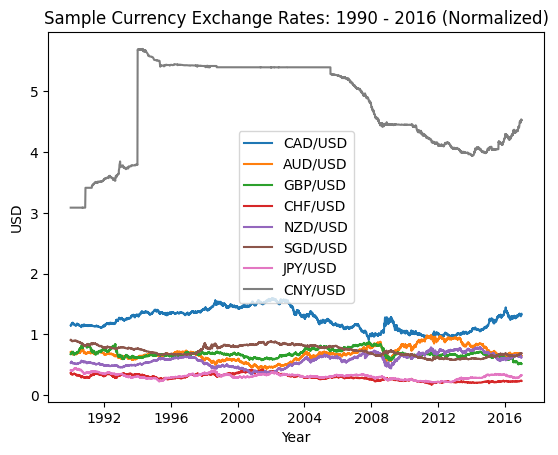

In [11]:
for s in currencies_all:
    
    data = s.data.loc["1990":"2016"]["Observed"].div(s.data["Observed"].iloc[0])

    plt.plot(data, label=s.name)

plt.legend()
plt.ylabel("USD")
plt.xlabel("Year")
plt.title("Sample Currency Exchange Rates: 1990 - 2016 (Normalized)")

## Percent Change

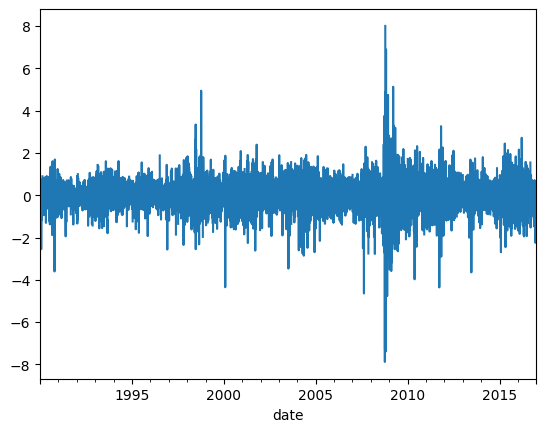

In [12]:
aud_exchange = aud.data.loc["1990":"2016"].Observed.pct_change().dropna()
ex = 100 * aud_exchange.asfreq("B")
fig, ax = plt.subplots()
ax = ex.plot(ax=ax)

## Positional Encoding

<AxesSubplot: xlabel='date'>

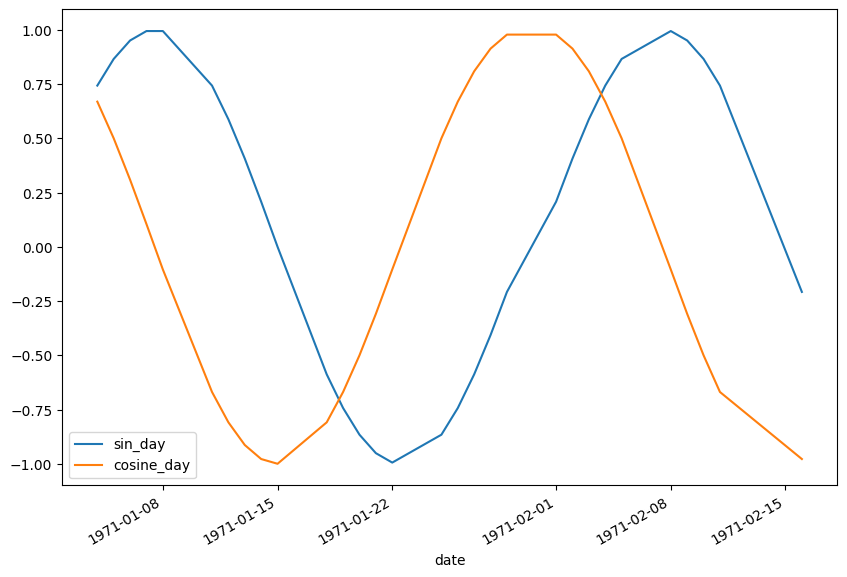

In [13]:
t = positional_encoding(cad.data)

graph_unit(t.iloc[:30], unit="day")

# AR Testing

## Stationarity Testing

In [14]:
# adapted from Atwan 2022 pg.310
def stationarity_testing(out: tuple, test: str = "adf") -> pd.Series:
    p_value = out[1]
    score = out[0]
    lags = out[2]
    dec = "Non-Stationary"
    if test == "adf":
        crit = out[4]
        if p_value < 0.05:
            dec = "Stationary"
    elif test == "kpss":
        crit = out[3]
        if p_value >= 0.05:
            dec = "Stationary"
    else:
        raise ValueError("Available tests are: Augmented Dickey-Fuller ('adf'), or Kwiatkowski-Phillips-Shin ('kpss').")
    results = {
        "Test Statistic": score,
        "p-value": p_value,
        "Lags": lags,
        "Decision": dec
    }
    
    for k, v in crit.items():
        results[f"Citical Value {k}"] = v
        
    return pd.Series(results, name=test)

In [15]:
adf_out = adfuller(cad.data.loc["1990":"2016"]["Observed"])
kpss_out = kpss(cad.data.loc["1990":"2016"]["Observed"])

pd.concat([stationarity_testing(adf_out, "adf"), stationarity_testing(kpss_out, "kpss")], axis=1)

/Users/sheplecjs/Library/Caches/pypoetry/virtualenvs/sdm-HAS9l-Vx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


,adf,kpss
Test Statistic,-1.340129,4.533177
p-value,0.610619,0.01
Lags,29,52
Decision,Non-Stationary,Non-Stationary
Citical Value 1%,-3.431318,0.739
Citical Value 5%,-2.861968,0.463
Citical Value 10%,-2.566998,0.347
Citical Value 2.5%,NaN,0.574


In [16]:
def check_stationarity(df: pd.DataFrame) -> Figure:
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = "Stationary", "Non-Stationary"
    
    if kpss_pv < 0.05:
        # reject kpss null hypothesis
        kpssh = "Non-Stationary"
    
    if adf_pv < 0.05:
        # reject adf null-hypothesis
        adfh = "Stationary"
        
    return (kpssh, adfh)

def plot_comparison(mehtods, plot_type: str = "line") -> None:
    n = len(methods) // 2
    fig, ax = plt.subplots(n, 2, sharex=True, figsize=(20, 10))
    for i, method in enumerate(methods):
        method.dropna(inplace=True)
        name = [n for n in globals() if globals()[n] is method]
        v, r = i // 2, i % 2
        
        kpss_s, adf_s = check_stationarity(method)
        
        method.plot(kind=plot_type,
                    ax=ax[v,r],
                    legend=False,
                    title=f"{name[0]} --> KPSS: {kpss_s}, ADF: {adf_s}")
        ax[v,r].title.set_size(20)
        method.rolling(52).mean().plot(ax=ax[v,r], legend=False)

In [133]:
first_order = aud.data.loc["1990":"2016"]["Observed"].diff().dropna()
second_order = cad.data.loc["1990":"2016"]["Observed"].diff().diff().dropna()
log_transform = np.log(cad.data.loc["1990":"2016"]["Observed"])
cyclic, trend = hpfilter(cad.data.loc["1990":"2016"]["Observed"])
bcox, lmda = boxcox(cad.data.loc["1990":"2016"]["Observed"])
bcox = pd.Series(bcox)

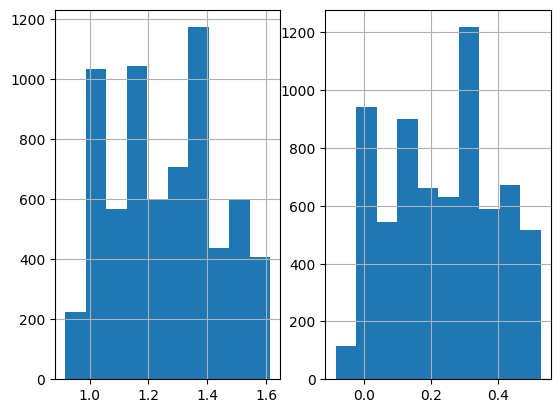

In [134]:
# bcox doesn't seem necessary

fig, ax = plt.subplots(1, 2)
cad.data.loc["1990":"2016"]["Observed"].hist(ax=ax[0])
bcox.hist(ax=ax[1])
plt.show()

/Users/sheplecjs/Library/Caches/pypoetry/virtualenvs/sdm-HAS9l-Vx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


kpss: Stationary
 adf: Stationary


<AxesSubplot: xlabel='date'>

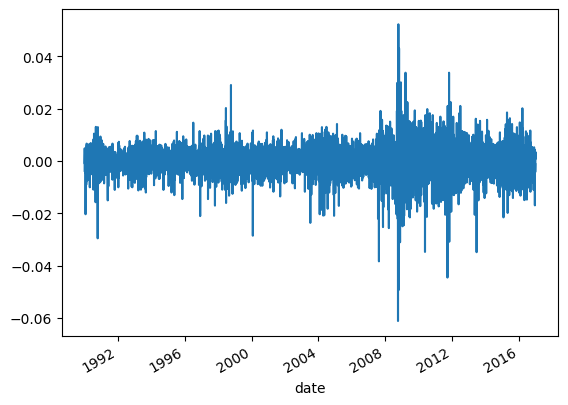

In [135]:
kpss_s, adf_s = check_stationarity(first_order)

print(f"kpss: {kpss_s}\n adf: {adf_s}")

first_order.plot(kind="line")

## Autocorrelation

In [136]:
# null for ljang-box is that there is no correlation between lags
# let's iterate over a stride checking for autocorrelation among lags
# across the entire time series then describe results

stride = 180
lags = 15
n = stride

start = acorr_ljungbox(first_order[:stride], return_df=True, lags=lags)["lb_pvalue"]

while n + stride <= len(first_order):
    stationarity_test = first_order.iloc[n:n+stride]
    start = pd.concat([start, acorr_ljungbox(stationarity_test, lags=lags)["lb_pvalue"]], axis=1)
    n += stride

s = start.std(axis=1)
mi = start.min(axis=1)
ma = start.max(axis=1)
me = start.mean(axis=1)

results = pd.DataFrame([s, mi, ma, me], ["std", "min", "max", "mean"])
results.T

,std,min,max,mean
1,0.321282,0.017104,0.991606,0.450655
2,0.303237,0.016906,0.972872,0.455977
3,0.311928,0.013056,0.990611,0.416314
4,0.298797,0.006124,0.997674,0.396347
5,0.302347,0.004826,0.969796,0.422083
6,0.278351,0.009601,0.973502,0.416178
7,0.300220,0.017850,0.984522,0.423611
8,0.301234,0.030411,0.981750,0.422360
9,0.293632,0.049159,0.987663,0.431750
10,0.275717,0.056730,0.974367,0.423618


#### Notes:

Because the null hypothesis for the Ljung-Box test is that there is no correlation for a given lag, a statistically significant value suggests that lag is correlated. Results of iterating over windows of the stationary data show that every tested lag is significant sometimes and not at all significant at other times.

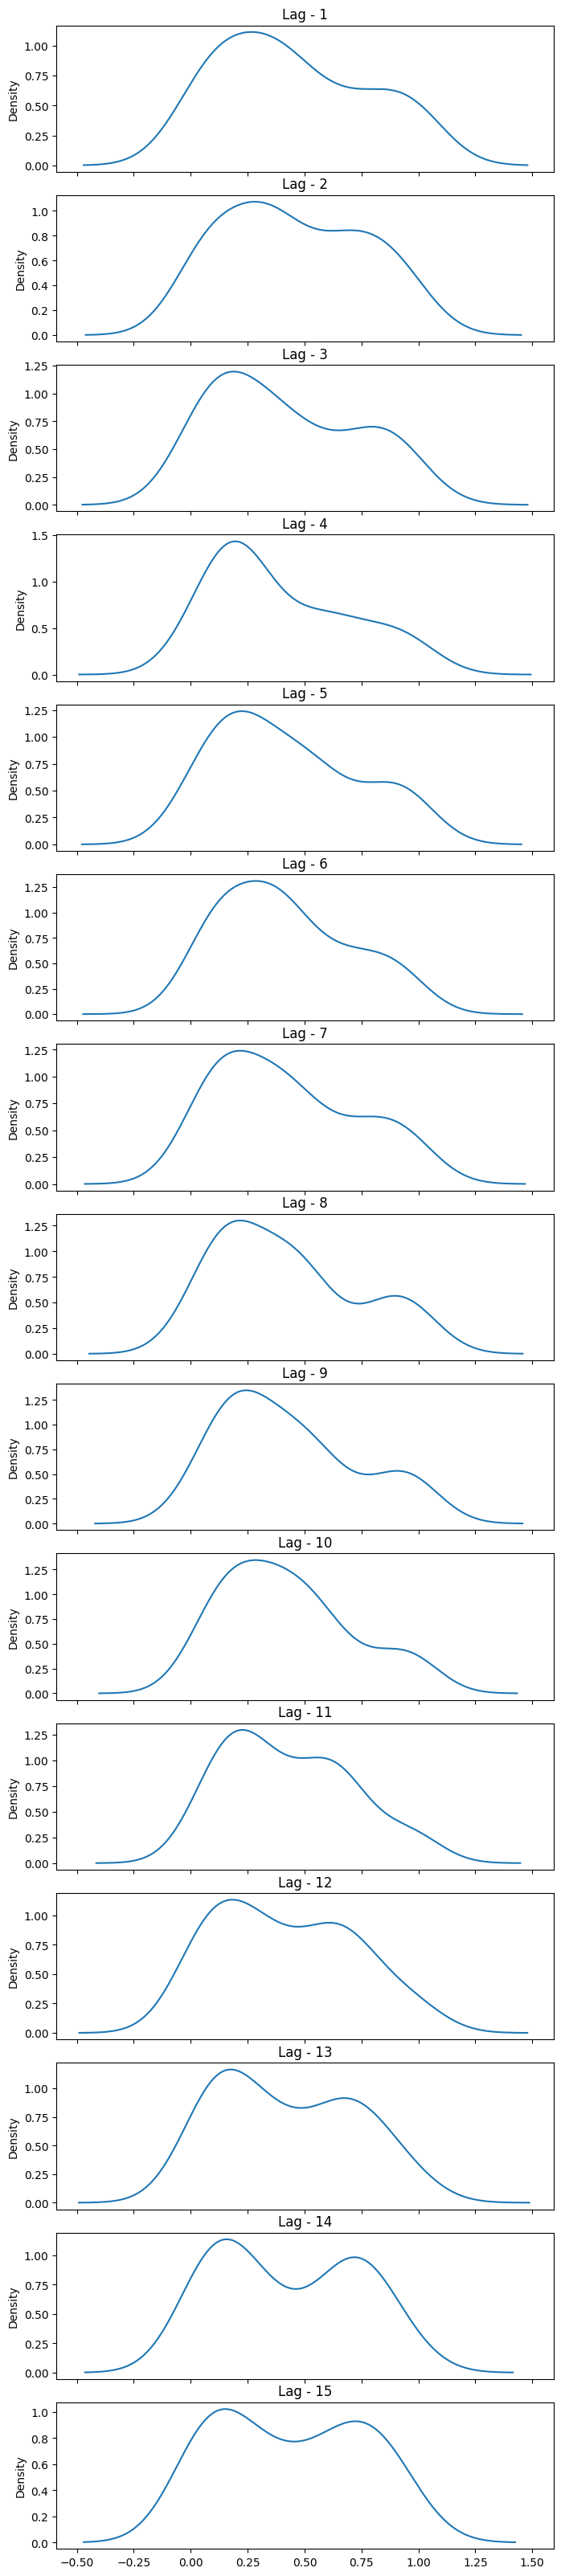

In [137]:
# density plots of lag p-value across windows
# some lags exhibit lower kurtosis, but nothing that would indicate 
# consistent nor reliable statistically significant correlation

fig, ax = plt.subplots(15, 1, figsize=(7,32), sharex=True)
fig.tight_layout()

for n in range (0, 15):
    start.T.loc[:,n+1].plot(kind="kde", ax=ax[n], title=f"Lag - {n + 1}")

## ARIMA Modeling

<AxesSubplot: xlabel='date'>

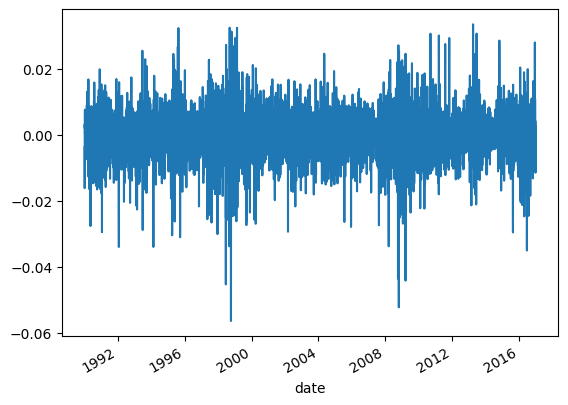

In [22]:
data = jpy.data.loc["1990":"2016"]["Observed"]
date_fx_log = np.log(data)
date_fx_log_diff = date_fx_log - date_fx_log.shift(1)
date_fx_log_diff.dropna(inplace=True)

date_fx_log_diff.plot()

/Users/sheplecjs/Library/Caches/pypoetry/virtualenvs/sdm-HAS9l-Vx-py3.8/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


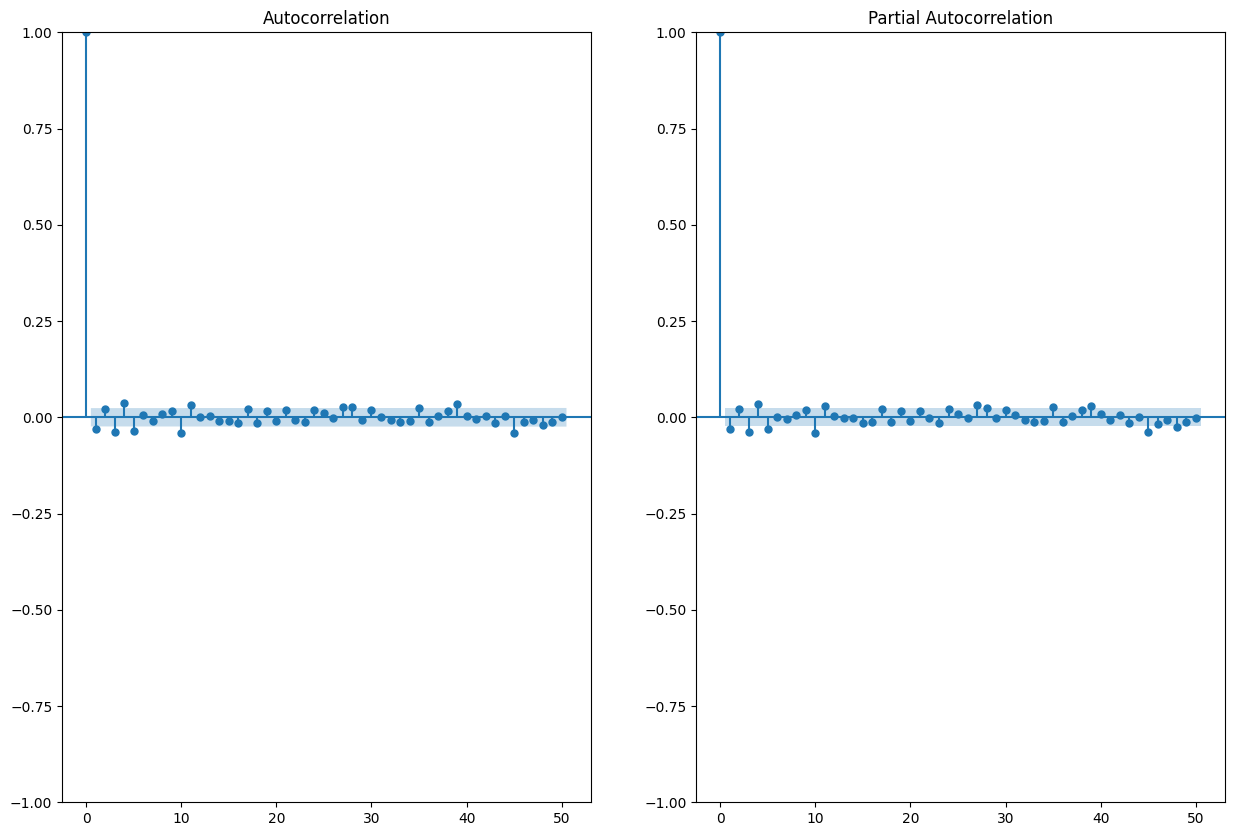

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
plot_acf(first_order, lags=50, ax=ax[0])
plot_pacf(first_order, lags=50, ax=ax[1])
plt.show()

In [168]:
train_idx = round(len(aud.data.loc["1990":"2016"]["Observed"]) * 0.9)

train = aud.data.loc["1990":"2016"]["Observed"][:train_idx]
test = aud.data.loc["1990":"2016"]["Observed"][train_idx:]

In [180]:
model = ARIMA(train, order=([5,10], 0, [5,39]))
results = model.fit(transformed=False)
results.summary()

/Users/sheplecjs/Library/Caches/pypoetry/virtualenvs/sdm-HAS9l-Vx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sheplecjs/Library/Caches/pypoetry/virtualenvs/sdm-HAS9l-Vx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sheplecjs/Library/Caches/pypoetry/virtualenvs/sdm-HAS9l-Vx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:                       Observed   No. Observations:                 6109
Model:             ARIMA([5, 10], 0, [5, 39])   Log Likelihood               18032.909
Date:                        Fri, 27 Jan 2023   AIC                         -36053.818
Time:                                08:23:29   BIC                         -36013.513
Sample:                                     0   HQIC                        -36039.834
                                       - 6109                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8031      0.053     15.280      0.000       0.700       0.906
ar.L5          0.9818      0.177      5.557      0.000       0.636       1.328
ar.L10         0.0148      0.176      0.084      0.933      -0.330       0.360
ma.L5         -0.0013      0.179     -0.007      0.994      -0.352       0.350
ma.L39         0.0484      0.010      5.081      0.000       0.030       0.067
sigma2         0.0002   1.47e-06    108.146      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                3821.45   Jarque-Bera (JB):             12643.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.46   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

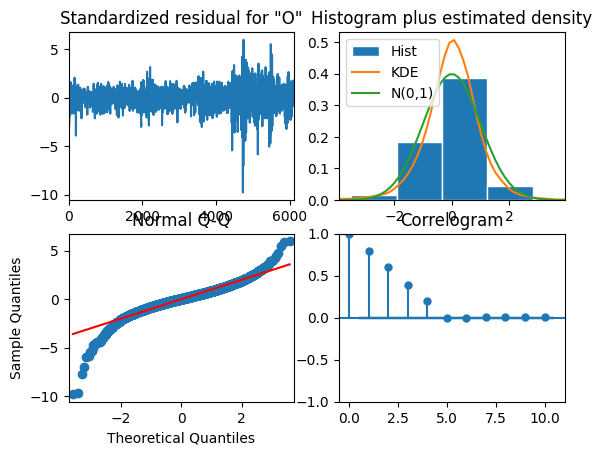

In [181]:
results.plot_diagnostics()
plt.show()

In [182]:
def plot_forecast(model, start, end, train, test):
    forecast = pd.DataFrame(model.forecast(test.shape[0]))
    forecast = forecast.set_index(test.index)
    ax = train.loc[start:].plot(style="--")
    test.loc[:end].plot(ax=ax)
    forecast.loc[:end].plot(ax=ax, style="-.")
    ax.legend(["orig_train", "orig_test", "forecast"])
    plt.show

/Users/sheplecjs/Library/Caches/pypoetry/virtualenvs/sdm-HAS9l-Vx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


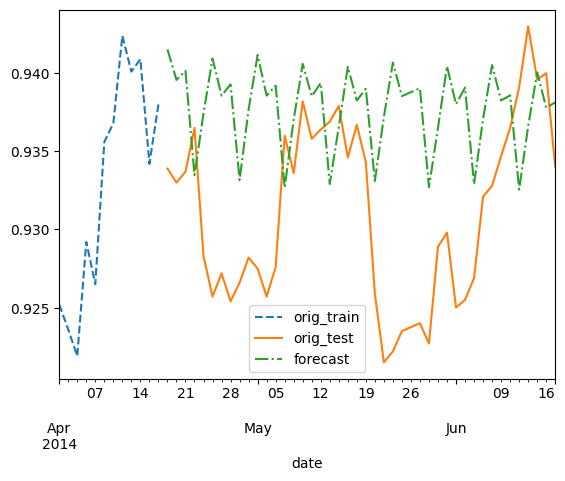

In [183]:
plot_forecast(results, "2014-04-01", "2014-06-17", train, test)

In [156]:
r = pd.DataFrame(results.forecast(test.shape[0]))
r.set_index(test.index)

/Users/sheplecjs/Library/Caches/pypoetry/virtualenvs/sdm-HAS9l-Vx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
date,
2014-04-17,1.102580
2014-04-18,1.102075
2014-04-21,1.102066
2014-04-22,1.101846
2014-04-23,1.101479
...,...
2016-12-23,1.085028
2016-12-27,1.085028
2016-12-28,1.085028


In [157]:
test.index

DatetimeIndex(['2014-04-17', '2014-04-18', '2014-04-21', '2014-04-22',
               '2014-04-23', '2014-04-24', '2014-04-25', '2014-04-28',
               '2014-04-29', '2014-04-30',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='date', length=679, freq=None)

/Users/sheplecjs/Library/Caches/pypoetry/virtualenvs/sdm-HAS9l-Vx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot: xlabel='date'>

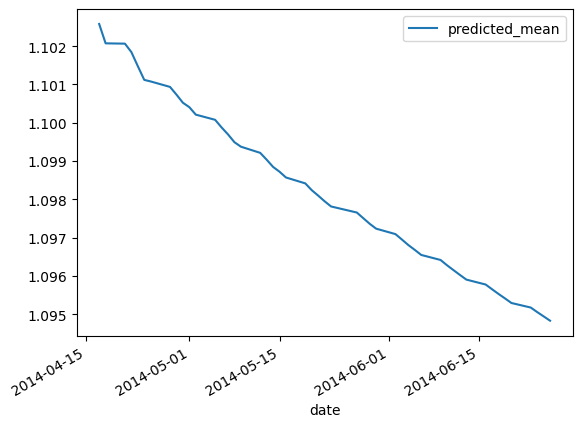

In [158]:
forecast = pd.DataFrame(results.forecast(test.shape[0]))
forecast = forecast.set_index(test.index)
forecast.iloc[:50].plot()